In [1]:
# Load library
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("weather.csv")
df.head()

,M_PACKET_FORMAT,M_GAME_MAJOR_VERSION,M_GAME_MINOR_VERSION,M_PACKET_VERSION,M_PACKET_ID,M_SESSION_UID,M_SESSION_TIME,M_FRAME_IDENTIFIER,M_PLAYER_CAR_INDEX,M_SECONDARY_PLAYER_CAR_INDEX,...,M_AI_DIFFICULTY,M_PIT_SPEED_LIMIT,M_NETWORK_GAME,M_TOTAL_LAPS,M_STEERING_ASSIST,M_IS_SPECTATING,M_DYNAMIC_RACING_LINE,M_DRSASSIST,M_NUM_MARSHAL_ZONES,Unnamed: 58
0,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,...,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
1,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,...,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
2,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,...,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
3,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,...,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN
4,2021,1,14,1,1,1.300210e+19,2803.836,82458,0,255,...,0,80,0.0,200.0,0.0,0.0,0.0,0.0,16.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3572328 entries, 0 to 3572327
Data columns (total 59 columns):
 #   Column                                          Dtype  
---  ------                                          -----  
 0   M_PACKET_FORMAT                                 int64  
 1   M_GAME_MAJOR_VERSION                            int64  
 2   M_GAME_MINOR_VERSION                            int64  
 3   M_PACKET_VERSION                                int64  
 4   M_PACKET_ID                                     int64  
 5   M_SESSION_UID                                   float64
 6   M_SESSION_TIME                                  float64
 7   M_FRAME_IDENTIFIER                              int64  
 8   M_PLAYER_CAR_INDEX                              int64  
 9   M_SECONDARY_PLAYER_CAR_INDEX                    int64  
 10  M_BRAKING_ASSIST                                int64  
 11  M_SESSION_LINK_IDENTIFIER                       int64  
 12  M_PIT_RELEASE_ASSIST        

In [4]:
(
    (df.isnull().sum()*100.00/df.shape[0])
    .sort_values(ascending=False)
)

Unnamed: 58                                       100.000000
M_ZONE_FLAG                                        72.727196
M_ZONE_START                                       72.727196
M_RAIN_PERCENTAGE                                  27.272804
M_TIME_OFFSET                                      27.272804
M_WEATHER_FORECAST_SAMPLES_M_WEATHER               27.272804
M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE     27.272804
M_TRACK_TEMPERATURE_CHANGE                         27.272804
M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE       27.272804
M_AIR_TEMPERATURE_CHANGE                           27.272804
M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE          27.272804
GAMEHOST                                           25.451638
M_NETWORK_GAME                                      0.000028
M_TOTAL_LAPS                                        0.000028
M_STEERING_ASSIST                                   0.000028
M_IS_SPECTATING                                     0.000028
M_DRSASSIST             

In [5]:
df_weather =df.copy()

In [6]:
# delete 100% missing values percentage feature
df_weather = df.drop(["Unnamed: 58","M_ZONE_FLAG","M_ZONE_START"],axis=1)

In [7]:
df_weather.shape

(3572328, 56)

In [8]:
df_weather = df_weather[~(df_weather.M_NUM_WEATHER_FORECAST_SAMPLES==0)]

In [9]:
df_weather = df_weather[~(df_weather.M_SESSION_UID==0)]  

In [10]:
df_weather.shape

(2745117, 56)

In [11]:
df_weather.columns.values

array(['M_PACKET_FORMAT', 'M_GAME_MAJOR_VERSION', 'M_GAME_MINOR_VERSION',
       'M_PACKET_VERSION', 'M_PACKET_ID', 'M_SESSION_UID',
       'M_SESSION_TIME', 'M_FRAME_IDENTIFIER', 'M_PLAYER_CAR_INDEX',
       'M_SECONDARY_PLAYER_CAR_INDEX', 'M_BRAKING_ASSIST',
       'M_SESSION_LINK_IDENTIFIER', 'M_PIT_RELEASE_ASSIST', 'TIMESTAMP',
       'M_PIT_STOP_WINDOW_IDEAL_LAP', 'M_TRACK_TEMPERATURE',
       'M_TRACK_LENGTH', 'M_GAME_PAUSED', 'M_FORECAST_ACCURACY',
       'GAMEHOST', 'M_AIR_TEMPERATURE', 'M_NUM_WEATHER_FORECAST_SAMPLES',
       'M_SLI_PRO_NATIVE_SUPPORT', 'M_SAFETY_CAR_STATUS', 'M_TRACK_ID',
       'M_ERSASSIST', 'M_FORMULA', 'M_SEASON_LINK_IDENTIFIER',
       'M_PIT_ASSIST', 'M_GEARBOX_ASSIST', 'M_SESSION_TYPE',
       'M_SPECTATOR_CAR_INDEX', 'M_PIT_STOP_WINDOW_LATEST_LAP',
       'M_WEEKEND_LINK_IDENTIFIER', 'M_DYNAMIC_RACING_LINE_TYPE',
       'M_SESSION_TIME_LEFT', 'M_SESSION_DURATION',
       'M_PIT_STOP_REJOIN_POSITION',
       'M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE',

In [12]:
df.M_WEATHER.value_counts()

0    2664421
1     763609
2     101486
5      42812
Name: M_WEATHER, dtype: int64

In [13]:
# Check correlation between predictors and output values
df.corr()[["M_WEATHER","M_RAIN_PERCENTAGE"]]

,M_WEATHER,M_RAIN_PERCENTAGE
M_PACKET_FORMAT,NaN,NaN
M_GAME_MAJOR_VERSION,NaN,NaN
M_GAME_MINOR_VERSION,-0.035001,-0.118432
M_PACKET_VERSION,NaN,NaN
M_PACKET_ID,NaN,NaN
M_SESSION_UID,-0.067724,-0.177354
M_SESSION_TIME,-0.007734,0.050886
M_FRAME_IDENTIFIER,-0.037441,-0.006011
M_PLAYER_CAR_INDEX,-0.265795,0.139027
M_SECONDARY_PLAYER_CAR_INDEX,NaN,NaN


In [14]:
# Choose features that give high correlation to the output/target 
predictors = ['TIMESTAMP', 'M_TRACK_TEMPERATURE', 'M_TRACK_LENGTH','M_FORECAST_ACCURACY', 'M_AIR_TEMPERATURE', 'M_NUM_WEATHER_FORECAST_SAMPLES', 'M_TRACK_ID','M_SEASON_LINK_IDENTIFIER', 'M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE',
       'M_TIME_OFFSET', 'M_WEATHER_FORECAST_SAMPLES_M_WEATHER','M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE','M_TRACK_TEMPERATURE_CHANGE','M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE',
       'M_AIR_TEMPERATURE_CHANGE', 'M_RAIN_PERCENTAGE', 'M_WEATHER','M_NUM_MARSHAL_ZONES']

df_weather_fix = df_weather[predictors]
df_weather_fix.head()

,TIMESTAMP,M_TRACK_TEMPERATURE,M_TRACK_LENGTH,M_FORECAST_ACCURACY,M_AIR_TEMPERATURE,M_NUM_WEATHER_FORECAST_SAMPLES,M_TRACK_ID,M_SEASON_LINK_IDENTIFIER,M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE,M_TIME_OFFSET,M_WEATHER_FORECAST_SAMPLES_M_WEATHER,M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE,M_TRACK_TEMPERATURE_CHANGE,M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE,M_AIR_TEMPERATURE_CHANGE,M_RAIN_PERCENTAGE,M_WEATHER,M_NUM_MARSHAL_ZONES
17017,1.642724e+09,33,4650,0,25,10,28,1553478724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16.0
17018,1.642724e+09,33,4650,0,25,10,28,1553478724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16.0
17019,1.642724e+09,33,4650,0,25,10,28,1553478724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16.0
17020,1.642724e+09,33,4650,0,25,10,28,1553478724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16.0
17021,1.642724e+09,33,4650,0,25,10,28,1553478724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16.0


<AxesSubplot:>

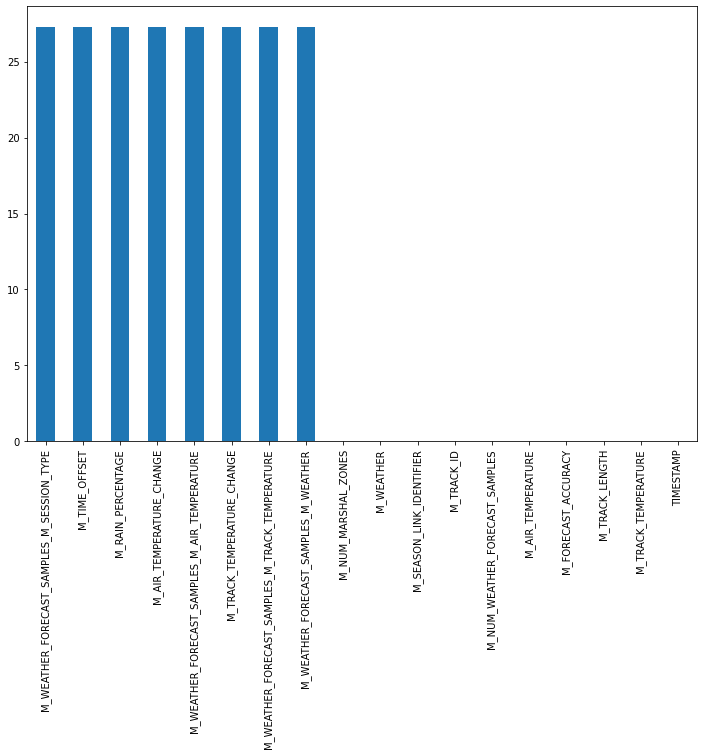

In [15]:
missing_values = (
    (df_weather_fix.isnull().sum()*100.00/df_weather_fix.shape[0])
    .sort_values(ascending=False)
)
plt.figure(figsize=(12,8))
missing_values.plot(kind="bar")



In [16]:
# Change column names into lower 
df_weather_fix.columns = df_weather_fix.columns.str.lower()
df_weather_fix

,timestamp,m_track_temperature,m_track_length,m_forecast_accuracy,m_air_temperature,m_num_weather_forecast_samples,m_track_id,m_season_link_identifier,m_weather_forecast_samples_m_session_type,m_time_offset,m_weather_forecast_samples_m_weather,m_weather_forecast_samples_m_track_temperature,m_track_temperature_change,m_weather_forecast_samples_m_air_temperature,m_air_temperature_change,m_rain_percentage,m_weather,m_num_marshal_zones
17017,1.642724e+09,33,4650,0,25,10,28,1553478724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16.0
17018,1.642724e+09,33,4650,0,25,10,28,1553478724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16.0
17019,1.642724e+09,33,4650,0,25,10,28,1553478724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16.0
17020,1.642724e+09,33,4650,0,25,10,28,1553478724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16.0
17021,1.642724e+09,33,4650,0,25,10,28,1553478724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3572323,1.642288e+09,33,4650,0,25,10,28,2756721461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,16.0
3572324,1.642288e+09,33,4650,0,25,10,28,2756721461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,16.0
3572325,1.642288e+09,33,4650,0,25,10,28,2756721461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,16.0
3572326,1.642288e+09,33,4650,0,25,10,28,2756721461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,16.0


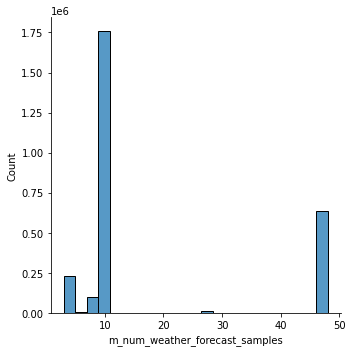

In [17]:
#Check distribution of m_num_weather_forecast_samples
sns.displot(df_weather_fix.m_num_weather_forecast_samples)

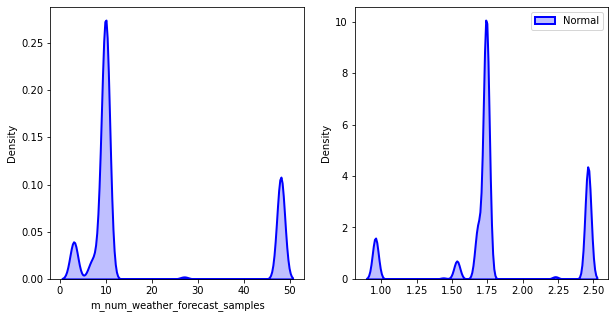

In [18]:
# Do Normalization on m_num_weather_forecast_samples using boxcox transformaton 
from scipy import stats
original_data = df_weather_fix.m_num_weather_forecast_samples
  
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(original_data)
  
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
  
# plotting the original data(non-normal) and 
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="blue", ax = ax[0])
  
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="blue", ax = ax[1])
  
# adding legends to the subplots
plt.legend(loc = "upper right")
  
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

In [19]:
df_weather_fix.columns

Index(['timestamp', 'm_track_temperature', 'm_track_length',
       'm_forecast_accuracy', 'm_air_temperature',
       'm_num_weather_forecast_samples', 'm_track_id',
       'm_season_link_identifier', 'm_weather_forecast_samples_m_session_type',
       'm_time_offset', 'm_weather_forecast_samples_m_weather',
       'm_weather_forecast_samples_m_track_temperature',
       'm_track_temperature_change',
       'm_weather_forecast_samples_m_air_temperature',
       'm_air_temperature_change', 'm_rain_percentage', 'm_weather',
       'm_num_marshal_zones'],
      dtype='object')

In [20]:
df_weather_fix.head()

,timestamp,m_track_temperature,m_track_length,m_forecast_accuracy,m_air_temperature,m_num_weather_forecast_samples,m_track_id,m_season_link_identifier,m_weather_forecast_samples_m_session_type,m_time_offset,m_weather_forecast_samples_m_weather,m_weather_forecast_samples_m_track_temperature,m_track_temperature_change,m_weather_forecast_samples_m_air_temperature,m_air_temperature_change,m_rain_percentage,m_weather,m_num_marshal_zones
17017,1.642724e+09,33,4650,0,25,10,28,1553478724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16.0
17018,1.642724e+09,33,4650,0,25,10,28,1553478724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16.0
17019,1.642724e+09,33,4650,0,25,10,28,1553478724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16.0
17020,1.642724e+09,33,4650,0,25,10,28,1553478724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16.0
17021,1.642724e+09,33,4650,0,25,10,28,1553478724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16.0


In [21]:
df_weather_fix[df_weather_fix.m_time_offset==5]['timestamp'].iloc[:10]

17039    1.642724e+09
17042    1.642724e+09
17116    1.642724e+09
17119    1.642724e+09
17193    1.642724e+09
17196    1.642724e+09
17270    1.642724e+09
17273    1.642724e+09
17347    1.642724e+09
17350    1.642724e+09
Name: timestamp, dtype: float64

In [22]:
# Check target variable 
target = ["m_weather","m_rain_percentage"]
df_weather_fix[target].head()

,m_weather,m_rain_percentage
17017,0,NaN
17018,0,NaN
17019,0,NaN
17020,0,NaN
17021,0,NaN


In [23]:
# Change missing values of  m_rain_percentage into 0
df_weather_fix["m_rain_percentage"] =df_weather_fix["m_rain_percentage"].fillna(0)
df_weather_fix["m_rain_percentage"].isnull().sum()

0

In [24]:
(
    (df_weather_fix.isnull().sum()*100.00/df_weather_fix.shape[0])
    .sort_values(ascending=False)
)

m_weather_forecast_samples_m_session_type         27.272827
m_weather_forecast_samples_m_weather              27.272827
m_time_offset                                     27.272827
m_air_temperature_change                          27.272827
m_weather_forecast_samples_m_air_temperature      27.272827
m_track_temperature_change                        27.272827
m_weather_forecast_samples_m_track_temperature    27.272827
m_num_marshal_zones                                0.000036
m_rain_percentage                                  0.000000
m_weather                                          0.000000
m_season_link_identifier                           0.000000
m_track_id                                         0.000000
m_num_weather_forecast_samples                     0.000000
m_air_temperature                                  0.000000
m_forecast_accuracy                                0.000000
m_track_length                                     0.000000
m_track_temperature                     

In [25]:
# Delete all missing values 
df_weather_fix.dropna(inplace=True)

In [26]:
df_weather_fix.head()

,timestamp,m_track_temperature,m_track_length,m_forecast_accuracy,m_air_temperature,m_num_weather_forecast_samples,m_track_id,m_season_link_identifier,m_weather_forecast_samples_m_session_type,m_time_offset,m_weather_forecast_samples_m_weather,m_weather_forecast_samples_m_track_temperature,m_track_temperature_change,m_weather_forecast_samples_m_air_temperature,m_air_temperature_change,m_rain_percentage,m_weather,m_num_marshal_zones
17038,1.642724e+09,33,4650,0,25,10,28,1553478724,8.0,0.0,0.0,33.0,2.0,25.0,2.0,1.0,0,16.0
17039,1.642724e+09,33,4650,0,25,10,28,1553478724,8.0,5.0,0.0,33.0,2.0,25.0,2.0,1.0,0,16.0
17040,1.642724e+09,33,4650,0,25,10,28,1553478724,8.0,10.0,0.0,33.0,2.0,25.0,2.0,2.0,0,16.0
17041,1.642724e+09,33,4650,0,25,10,28,1553478724,10.0,0.0,1.0,32.0,1.0,24.0,1.0,5.0,0,16.0
17042,1.642724e+09,33,4650,0,25,10,28,1553478724,10.0,5.0,1.0,32.0,2.0,24.0,2.0,5.0,0,16.0


<AxesSubplot:xlabel='m_track_temperature', ylabel='m_rain_percentage'>

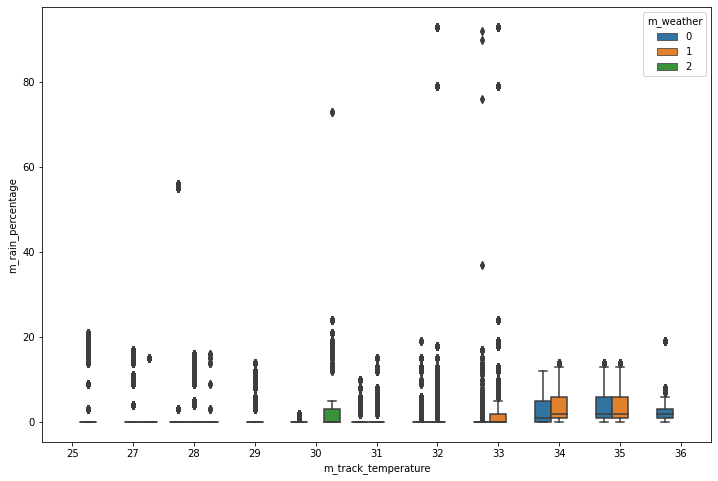

In [27]:
# Check distribution between m_track_temperature	and m_rain_percentage for each m_weather. We can see some outliers in temperature between 28 to 33
plt.figure(figsize=(12,8))
sns.boxplot(data=df_weather_fix, x="m_track_temperature", y="m_rain_percentage",hue="m_weather")

In [28]:
# Implement ML and evaluation for target(m_rain_percentage)
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [29]:
# Split the data for testing nd training
features =[col for col in df_weather_fix.columns if col not in ["m_rain_percentage"]]
X = df_weather_fix[features]
Y = df_weather_fix["m_rain_percentage"]
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state= 0)

In [30]:
# Check Training Values
X_train

,timestamp,m_track_temperature,m_track_length,m_forecast_accuracy,m_air_temperature,m_num_weather_forecast_samples,m_track_id,m_season_link_identifier,m_weather_forecast_samples_m_session_type,m_time_offset,m_weather_forecast_samples_m_weather,m_weather_forecast_samples_m_track_temperature,m_track_temperature_change,m_weather_forecast_samples_m_air_temperature,m_air_temperature_change,m_weather,m_num_marshal_zones
1867302,1.642384e+09,32,4650,0,24,7,28,2184232491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,16.0
2399773,1.641819e+09,35,5408,0,28,48,3,3271241059,10.0,120.0,1.0,27.0,1.0,22.0,1.0,0,17.0
294133,1.642431e+09,33,5408,1,27,48,3,2684478162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,17.0
2960749,1.641818e+09,35,5408,0,28,48,3,3271241059,1.0,5.0,0.0,36.0,2.0,29.0,2.0,0,17.0
2964876,1.641818e+09,35,5408,0,28,48,3,3271241059,10.0,120.0,1.0,27.0,1.0,22.0,1.0,0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347881,1.642374e+09,35,5408,1,28,48,3,3589936465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,17.0
1586787,1.642371e+09,33,4650,0,25,10,28,2184232491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,16.0
298951,1.642373e+09,33,4650,0,25,10,28,2184232491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,16.0
2702811,1.642135e+09,27,5441,0,19,10,2,3846328331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,19.0


In [31]:
#Check taget values
y_train

1867302     0.0
2399773    10.0
294133      0.0
2960749     3.0
2964876    10.0
           ... 
347881      0.0
1586787     0.0
298951      0.0
2702811     0.0
568673      4.0
Name: m_rain_percentage, Length: 1497333, dtype: float64

In [33]:
model = XGBRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(f"The MAE is {mean_absolute_error(y_test,pred)}")

The MAE is 0.01040666735948845


In [34]:
result = pd.DataFrame({"Prediction Value":pred,"Actual Value":y_test})
result.head()

,Prediction Value,Actual Value
2709680,0.000416,0.0
2513548,1.003593,1.0
1869788,0.000090,0.0
755237,2.041785,2.0
319895,0.000130,0.0


In [35]:
# Evaluate result 
model.score(X_test,y_test)

0.9998011849286095

In [36]:
df_weather_fix.columns

Index(['timestamp', 'm_track_temperature', 'm_track_length',
       'm_forecast_accuracy', 'm_air_temperature',
       'm_num_weather_forecast_samples', 'm_track_id',
       'm_season_link_identifier', 'm_weather_forecast_samples_m_session_type',
       'm_time_offset', 'm_weather_forecast_samples_m_weather',
       'm_weather_forecast_samples_m_track_temperature',
       'm_track_temperature_change',
       'm_weather_forecast_samples_m_air_temperature',
       'm_air_temperature_change', 'm_rain_percentage', 'm_weather',
       'm_num_marshal_zones'],
      dtype='object')

In [37]:
# Check for Classification Problem for target m_weather
features =[col for col in df_weather_fix.columns if col not in ["m_weather"]]
X = df_weather_fix[features]
Y = df_weather_fix["m_weather"]
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state = 10)

In [38]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)


In [39]:
# Evaluate result 
model.score(X_test,y_test)

0.9964717337992274

In [40]:
output_classifier = pd.DataFrame({"Prediction Value":pred,"Actual Value":y_test})
output_classifier

,Prediction Value,Actual Value
883479,0,0
2524399,1,1
2986879,0,0
698660,0,0
3558906,0,0
...,...,...
3425855,0,0
3466837,0,0
676210,1,1
1015447,0,0


In [41]:
df_weather_fix.head()

,timestamp,m_track_temperature,m_track_length,m_forecast_accuracy,m_air_temperature,m_num_weather_forecast_samples,m_track_id,m_season_link_identifier,m_weather_forecast_samples_m_session_type,m_time_offset,m_weather_forecast_samples_m_weather,m_weather_forecast_samples_m_track_temperature,m_track_temperature_change,m_weather_forecast_samples_m_air_temperature,m_air_temperature_change,m_rain_percentage,m_weather,m_num_marshal_zones
17038,1.642724e+09,33,4650,0,25,10,28,1553478724,8.0,0.0,0.0,33.0,2.0,25.0,2.0,1.0,0,16.0
17039,1.642724e+09,33,4650,0,25,10,28,1553478724,8.0,5.0,0.0,33.0,2.0,25.0,2.0,1.0,0,16.0
17040,1.642724e+09,33,4650,0,25,10,28,1553478724,8.0,10.0,0.0,33.0,2.0,25.0,2.0,2.0,0,16.0
17041,1.642724e+09,33,4650,0,25,10,28,1553478724,10.0,0.0,1.0,32.0,1.0,24.0,1.0,5.0,0,16.0
17042,1.642724e+09,33,4650,0,25,10,28,1553478724,10.0,5.0,1.0,32.0,2.0,24.0,2.0,5.0,0,16.0


In [42]:
df_weather_fix.shape

(1996445, 18)

In [43]:
output_classifier.shape

(499112, 2)

In [44]:
result.shape

(499112, 2)

In [49]:
y_test.shape

(499112,)

In [50]:
combined_result =pd.concat([X_test,y_test,X_test,output_classifier,result],axis=1,ignore_index=False)
combined_result.head()

,timestamp,m_track_temperature,m_track_length,m_forecast_accuracy,m_air_temperature,m_num_weather_forecast_samples,m_track_id,m_season_link_identifier,m_weather_forecast_samples_m_session_type,m_time_offset,...,m_weather_forecast_samples_m_track_temperature,m_track_temperature_change,m_weather_forecast_samples_m_air_temperature,m_air_temperature_change,m_rain_percentage,m_num_marshal_zones,Prediction Value,Actual Value,Prediction Value,Actual Value
17038,1.642724e+09,33.0,4650.0,0.0,25.0,10.0,28.0,1.553479e+09,8.0,0.0,...,33.0,2.0,25.0,2.0,1.0,16.0,0.0,0.0,1.264742,1.0
17040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.938528,2.0
17043,1.642724e+09,33.0,4650.0,0.0,25.0,10.0,28.0,1.553479e+09,10.0,10.0,...,32.0,2.0,24.0,2.0,5.0,16.0,0.0,0.0,NaN,NaN
17044,1.642724e+09,33.0,4650.0,0.0,25.0,10.0,28.0,1.553479e+09,10.0,15.0,...,32.0,2.0,24.0,2.0,7.0,16.0,0.0,0.0,6.937489,7.0
17046,1.642724e+09,33.0,4650.0,0.0,25.0,10.0,28.0,1.553479e+09,10.0,45.0,...,31.0,2.0,23.0,1.0,6.0,16.0,0.0,0.0,NaN,NaN


In [52]:
# load the model from disk
import pickle
 
# Save the trained model as a pickle string.
saved_xgb_model = pickle.dumps(model)
 
# Load the pickled model
xgb_from_pickle = pickle.loads(saved_xgb_model)
 
# Use the loaded pickled model to make predictions
xgb_from_pickle.predict(X_test)


# Save the trained model as a pickle string.
saved_rf_model = pickle.dumps(model)
 
# Load the pickled model
rf_from_pickle = pickle.loads(saved_rf_model)
 
# Use the loaded pickled model to make predictions
rf_from_pickle.predict(X_test)


array([0, 1, 0, ..., 1, 0, 1])